# **Crash Course on Causal Inference in Data Science**

**Introduction to Causal Inference**

Causal inference is the process of determining the cause-and-effect relationship between variables. In data science, it's a critical step beyond correlation, helping us understand not just whether variables move together, but whether one causes the other to move.

**Why Is Causal Inference Important?**

While correlation can indicate a relationship between two variables, it doesn’t imply causation. For instance, ice cream sales and swimming pool accidents both increase in the summer. They’re correlated because of the season (a confounder), not because one causes the other. Causal inference helps us understand the underlying relationships between variables, enabling more informed decision-making.

Fundamental Concepts

1. **Confounding Variables:** Factors that influence both the independent and dependent variables, potentially misleading the analysis.
2. **Treatment and Control Groups:** In experiments, the treatment group receives the intervention, and the control group does not, allowing for comparison.
3. **Randomization:** The process of randomly assigning subjects to treatment or control groups to minimize bias.
4. **Counterfactuals:** Imagining what would have happened to the same subjects in an alternate scenario. It's the core of causal inference, comparing the actual outcome with the counterfactual one.

**Techniques for Causal Inference**

1. **Randomized Controlled Trials (RCTs):** The gold standard for causal inference, where subjects are randomly assigned to treatment or control groups.
2. **Propensity Score Matching (PSM):** In observational studies, PSM is used to create comparable groups based on observed covariates, mimicking randomization.
3. **Difference-in-Differences (DiD):** This method compares the before-and-after differences between a treatment group and a control group.
4. **Instrumental Variables (IV):** When random assignment is not possible, IVs can be used to account for hidden biases.
5. **Regression Discontinuity Design (RDD):** This method exploits a cutoff or threshold in the assignment of treatments, analyzing the discontinuity for causal effects.
6. **Directed Acyclic Graphs (DAGs) and Structural Equation Modeling (SEM):** These are graphical methods to visualize and quantify causal relationships.

# **Lets apply this to Worl Happiness Dataset**

# **About the Dataset:**

This dataset is a simple dataset that is used for Shapley analysis to predict the “happiness score” for 156 countries on data from 2015 to 2019 using the following factors: GDP per capita, social support, healthy life expecency, freedom, generosity, corruption, and year.

['Country',
'Happiness rank',
'Happiness Score',
'GDP per capita',
'Social support',
'Healthy life',
'Freedom',
'Generosity',
'Corruption',
'Year']

In [1]:
!pip install lingam
!pip install lingam DoWhy



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.7/95.7 kB 512.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 6.1 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659681 sha256=7b97474067279e25ab4bc186361ce5123498c605dc4adfc0ebd027886b2253c7
  Stored in directory: /root/.cache/pip/wheels/53/ec/0d/0b294c02d8c4e9e80afea58839f2c1b4706770594bc99ec045
Successfully built semopy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 7.9 MB/s eta 0:00:00


**LiNGAM (Linear Non-Gaussian Acyclic Model)** is a class of causal models designed for discovering the causal structure in multivariate time series or observational data. The fundamental assumption of LiNGAM is that the relationships between variables are linear, and the latent confounding variables have non-Gaussian distributions. LiNGAM can be useful for uncovering the directionality of causality between variables.

The `lingam` package in Python provides tools for estimating and analyzing LiNGAM models. It includes algorithms for learning the causal structure, such as the DirectLiNGAM algorithm. The `lingam` package is often used in the context of time-series data or observational studies where the goal is to infer the causal relationships between variables.

**DoWhy** is a Python library for causal inference. It's designed to make it easier to specify, estimate, and analyze causal models. DoWhy combines the strengths of causal graphical models (DAGs) and potential outcomes frameworks to allow users to express causal assumptions and estimate causal effects.

In the context of LiNGAM and DoWhy, the idea is to use LiNGAM to estimate the causal structure and then integrate this information into a causal model within the DoWhy framework. This allows for a more comprehensive causal analysis, incorporating both the causal relationships learned by LiNGAM and domain-specific causal assumptions.

Here's a brief overview of how the two can work together:

1. **Use LiNGAM to Estimate Causal Structure:**
   - Fit a LiNGAM model to your data using the `lingam` package.
   - Visualize the causal graph and obtain information about the causal relationships.

2. **Integrate with DoWhy:**
   - Use the LiNGAM causal structure as input to a causal model in DoWhy.
   - Specify the treatment variable, outcome variable, and potential confounders.

3. **Causal Inference:**
   - Leverage DoWhy to estimate causal effects, perform sensitivity analysis, and conduct hypothesis testing based on the combined causal model.

This combined approach allows you to benefit from both the LiNGAM package for causal structure learning and the DoWhy library for a broader causal inference framework. It's particularly useful when you want to incorporate additional causal assumptions and perform more extensive causal analysis beyond what LiNGAM alone provides.

In [2]:

import numpy as np # linear algebra
import pandas as pd
from sklearn.model_selection import train_test_split
from lingam import DirectLiNGAM
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import lingam
from lingam.utils import make_dot, make_prior_knowledge


In [3]:
# load data
df = pd.read_csv("/content/World_Happiness_2015_2019_Imputed.csv")
df.head()

,Country,Happiness rank,Happiness Score,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Happiness Score  782 non-null    float64
 1   GDP per capita   777 non-null    float64
 2   Social support   777 non-null    float64
 3   Healthy life     777 non-null    float64
 4   Freedom          777 non-null    float64
 5   Generosity       777 non-null    float64
 6   Corruption       775 non-null    float64
 7   Year             782 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 49.0 KB


In [8]:
df.head()


,Happiness Score,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


<Axes: >

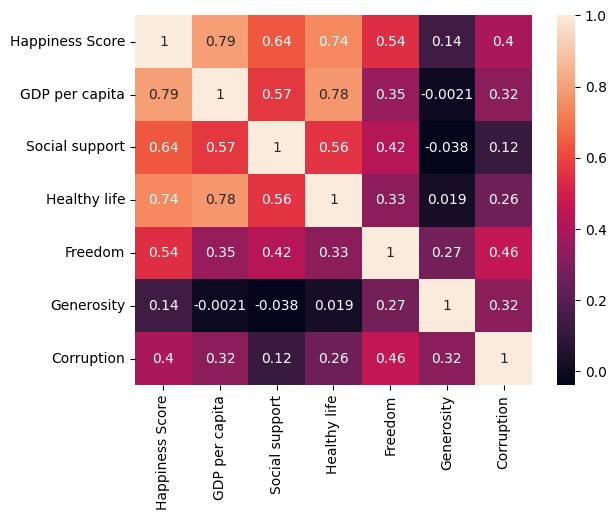

In [15]:
# @title Correlation matrix of Happiness Score factors

import seaborn as sns
sns.heatmap(df[['Happiness Score', 'GDP per capita', 'Social support', 'Healthy life', 'Freedom', 'Generosity', 'Corruption']].corr(), annot=True)

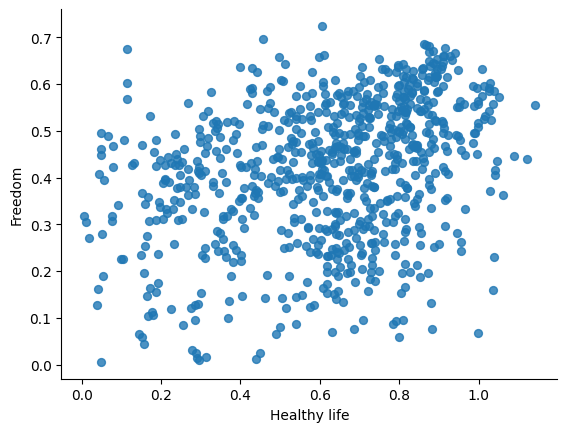

In [13]:
# @title Healthy life vs Freedom

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Healthy life', y='Freedom', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

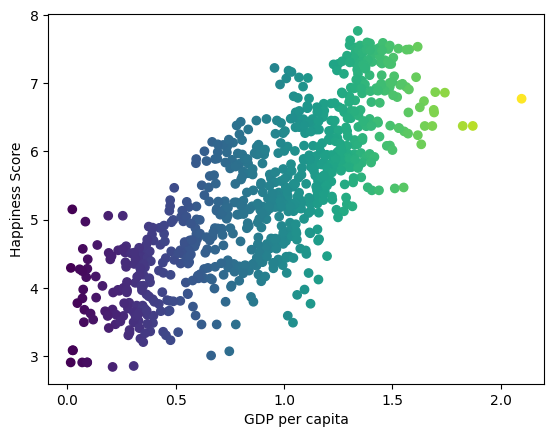

In [11]:
# @title Happiness Score vs GDP per capita

import matplotlib.pyplot as plt
plt.scatter(df['GDP per capita'], df['Happiness Score'], c=df['GDP per capita'])
plt.xlabel('GDP per capita')
_ = plt.ylabel('Happiness Score')

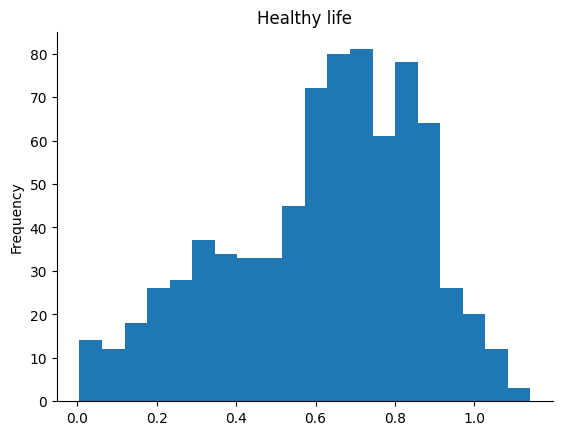

In [10]:
# @title Healthy life

from matplotlib import pyplot as plt
df['Healthy life'].plot(kind='hist', bins=20, title='Healthy life')
plt.gca().spines[['top', 'right',]].set_visible(False)

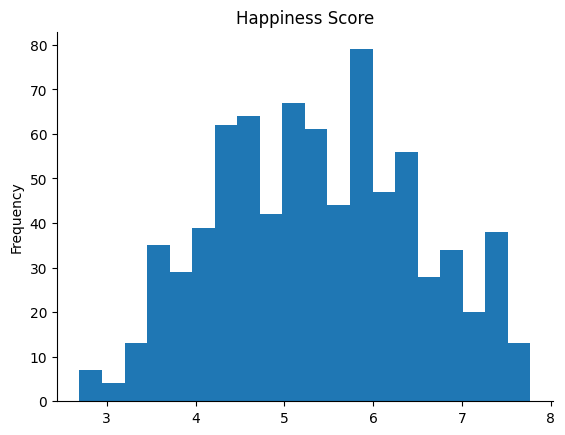

In [9]:
# @title Happiness Score

from matplotlib import pyplot as plt
df['Happiness Score'].plot(kind='hist', bins=20, title='Happiness Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
# Missing values
df.isnull().sum()

Country            0
Happiness rank     0
Happiness Score    0
GDP per capita     5
Social support     5
Healthy life       5
Freedom            5
Generosity         5
Corruption         7
Year               0
dtype: int64

In [5]:
# Drop the specified column
column_to_drop = ['Country']
df = df.drop(column_to_drop, axis=1)
column_to_drop = ['Happiness rank']
df = df.drop(column_to_drop, axis=1)
#Dropping the missing value rows
df_cleaned = df.dropna()

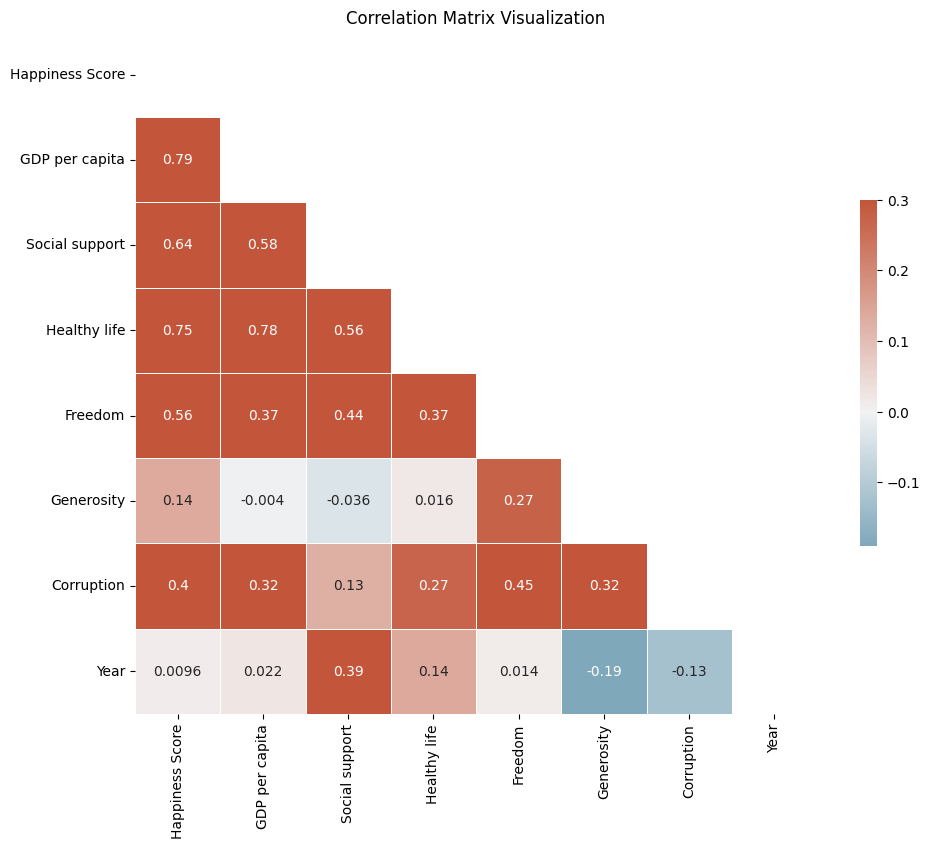

In [16]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio, add annotations for clarity
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix Visualization')
plt.show()

In [17]:
# Assume you have a cleaned dataset named 'df_cleaned2'
data = df_cleaned.copy()

# Specify the columns in your dataset
features = ['GDP per capita', 'Social support', 'Healthy life', 'Freedom']
outcome_variable = 'Happiness Score'

In [18]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [19]:
# Use LiNGAM to estimate causal relationships
model = lingam.DirectLiNGAM(
                    random_state=42,
                    measure = 'pwling'
                    )
model.fit(train_data[features])

Adjacency Matrix Dimensions: (4, 4)
Number of Labels: 4
Causal graph image saved as causal_graph_enhanced.png


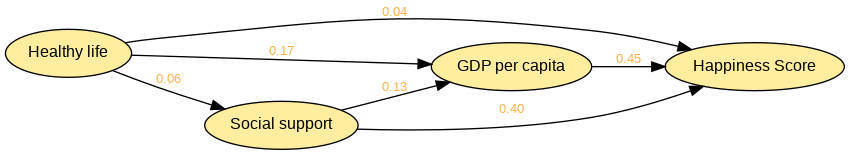

In [22]:
from graphviz import Digraph

def plot_causal_graph_enhanced(adjacency_matrix, labels):
    print("Adjacency Matrix Dimensions:", adjacency_matrix.shape)
    print("Number of Labels:", len(labels))

    # Settings for visual enhancements
    node_attr = {
        'style': 'filled',
        'fillcolor': '#FFEDA0',  # Light yellow fill
        'fontname': 'Helvetica',
        'fontsize': '12'
    }
    edge_attr = {
        'fontsize': '10',
        'fontname': 'Helvetica',
        'fontcolor': '#FEB24C',
    }

    num_nodes = min(len(labels), adjacency_matrix.shape[0])

    dot = Digraph(comment='Causal Graph', format='png')
    dot.attr(rankdir='LR')  # Left to Right graph
    dot.attr('node', **node_attr)
    dot.attr('edge', **edge_attr)

    # Add nodes with enhanced visual styles
    for i in range(num_nodes):
        dot.node(str(i), labels[i])

    # Add edges with labels for coefficients
    for i in range(num_nodes):
        for j in range(num_nodes):
            if adjacency_matrix[i, j] != 0:
                dot.edge(str(i), str(j), label=f"{adjacency_matrix[i, j]:.2f}")

    filename = 'causal_graph_enhanced'
    dot.render(filename, cleanup=True)
    print(f"Causal graph image saved as {filename}.png")
    return f"{filename}.png"

# Use this updated function for plotting
image_path = plot_causal_graph_enhanced(model.adjacency_matrix_, data.columns.to_list()[:4])

# Display the enhanced causal graph image
from IPython.display import Image
Image(image_path)


The causal graph, generated from the LiNGAM model and visualized using the Graphviz library, is a representation of the inferred causal relationships among variables. Each node in the graph corresponds to a variable, and directed edges between nodes indicate a potential causal relationship from the source node to the target node.

In the context of LiNGAM and causal graphs:

1. **Nodes (Variables):** Each node represents a variable, such as a feature or factor in your dataset.

2. **Directed Edges (Arrows):** The directed edges between nodes represent the direction of the causal relationship. An arrow from Node A to Node B suggests that changes in Node A may cause changes in Node B.

3. **Adjacency Matrix Values:** The weight of each edge (arrow) is determined by the corresponding entry in the adjacency matrix. Larger absolute values in the matrix indicate a stronger causal relationship.

4. **Acyclic Structure:** LiNGAM models specifically focus on acyclic graphs, meaning there are no cycles or feedback loops in the causal relationships. This acyclic structure is essential for identifying causal directions.

5. **Graph Visualization:** The graph visualization provides an intuitive representation of the causal structure. It helps identify which variables are likely to be causes (sources) and which are likely to be effects (targets).

**Interpretation:**
-  If there's an arrow from Variable GDP per capita to Variable Happiness Score, it suggests that changes in GDP per capita may have a causal effect on Happiness Score.
- The absence of an arrow between two variables indicates that there's no direct causal relationship between them (given the assumptions of the LiNGAM model).
- For Healthy Life, there are outgoing causal effects to all the rest of the variables.
- Freedom does have any connection from any other variables, neither incoming nor outgoing.
- For Happiness Score, there is significant incoming causal effects from both GDP percapita and Social Support, while there is incoming causal effect from healthy life as well. It is not significant enough.


**Importance:**
- **Causal Inference:** The graph is a tool for inferring causal relationships. It doesn't prove causation, but it provides a structured representation of potential causal directions based on statistical patterns in the data.
  
- **Model Validation:** It helps validate the LiNGAM model's assumptions. If the graph aligns with domain knowledge and expectations, it adds confidence in the model's effectiveness.

- **Decision Making:** Understanding causal relationships is crucial for decision-making. For example, in policy interventions, identifying variables that have a strong causal influence on desired outcomes can inform effective strategies.

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from dowhy import CausalModel
from lingam import DirectLiNGAM



# Fit a LiNGAM model
lingam_model = DirectLiNGAM()
lingam_model.fit(train_data[features])

# Perform causal inference using DoWhy for each feature
for feature in features:
    print(f"\nCausal Inference for {feature} as the treatment variable:")

    # Create a causal model for the specific feature
    causal_model = CausalModel(
        data=train_data,
        treatment=feature,
        outcome=outcome_variable,
        common_causes=[col for col in features if col != feature]
    )

    # Identify the causal effect
    identified_estimand = causal_model.identify_effect()

    # Estimate the causal effect using LiNGAM coefficients
    # Note: LiNGAM coefficients can be used in a linear regression model
    lingam_coefs = lingam_model.adjacency_matrix_[features.index(feature), :]
    test_data['Predicted Happiness Score'] = np.dot(test_data[features].values, lingam_coefs)

    # Print the estimated average treatment effect
    mse = mean_squared_error(test_data[outcome_variable], test_data['Predicted Happiness Score'])
    print(f'Estimated Average Treatment Effect: {mse}')



Causal Inference for GDP per capita as the treatment variable:
Estimated Average Treatment Effect: 30.658384097717924

Causal Inference for Social support as the treatment variable:
Estimated Average Treatment Effect: 25.940450931637425

Causal Inference for Healthy life as the treatment variable:
Estimated Average Treatment Effect: 24.956170840157807

Causal Inference for Freedom as the treatment variable:
Estimated Average Treatment Effect: 27.81193433967488


The above values are estimated average treatment effects for each treatment variable (GDP per capita, Social support, Healthy life, and Freedom) based on the causal inference analysis using DoWhy and LiNGAM. The average treatment effect (ATE) represents the average causal effect of changing the treatment variable (in this case, each of the features) on the outcome variable (Happiness Score).

Here's what each line means:

1. **Causal Inference for GDP per capita as the treatment variable:**
   - Estimated Average Treatment Effect: 30.66
   - This suggests that, on average, a one-unit increase in GDP per capita is associated with an increase of approximately 30.66 units in Happiness Score.

2. **Causal Inference for Social support as the treatment variable:**
   - Estimated Average Treatment Effect: 25.94
   - This suggests that, on average, a one-unit increase in Social support is associated with an increase of approximately 25.94 units in Happiness Score.

3. **Causal Inference for Healthy life as the treatment variable:**
   - Estimated Average Treatment Effect: 24.96
   - This suggests that, on average, a one-unit increase in Healthy life is associated with an increase of approximately 24.96 units in Happiness Score.

4. **Causal Inference for Freedom as the treatment variable:**
   - Estimated Average Treatment Effect: 27.81
   - This suggests that, on average, a one-unit increase in Freedom is associated with an increase of approximately 27.81 units in Happiness Score.

These values indicate the average impact or influence of each feature on the Happiness Score, as estimated by the causal inference analysis. Keep in mind that these are average effects, and individual cases may vary. Additionally, the interpretation depends on the context and the units of measurement for each variable.

**Interpretation:**

The average treatment effect (ATE) signifies the average impact of changing each treatment variable on the outcome variable, Happiness Score. Specifically, a one-unit increase in GDP per capita is associated with an average increase of approximately 30.66 units in Happiness Score. Similarly, a one-unit increase in Social support, Healthy life, and Freedom corresponds to average increases of around 25.94, 24.96, and 27.81 units in Happiness Score, respectively. These findings provide insights into the average influence of each feature on Happiness Score, bearing in mind that individual cases may exhibit variations. The interpretation is contingent on the specific context and the units of measurement for each variable.

Causal Ordering: [0, 1, 2, 3]


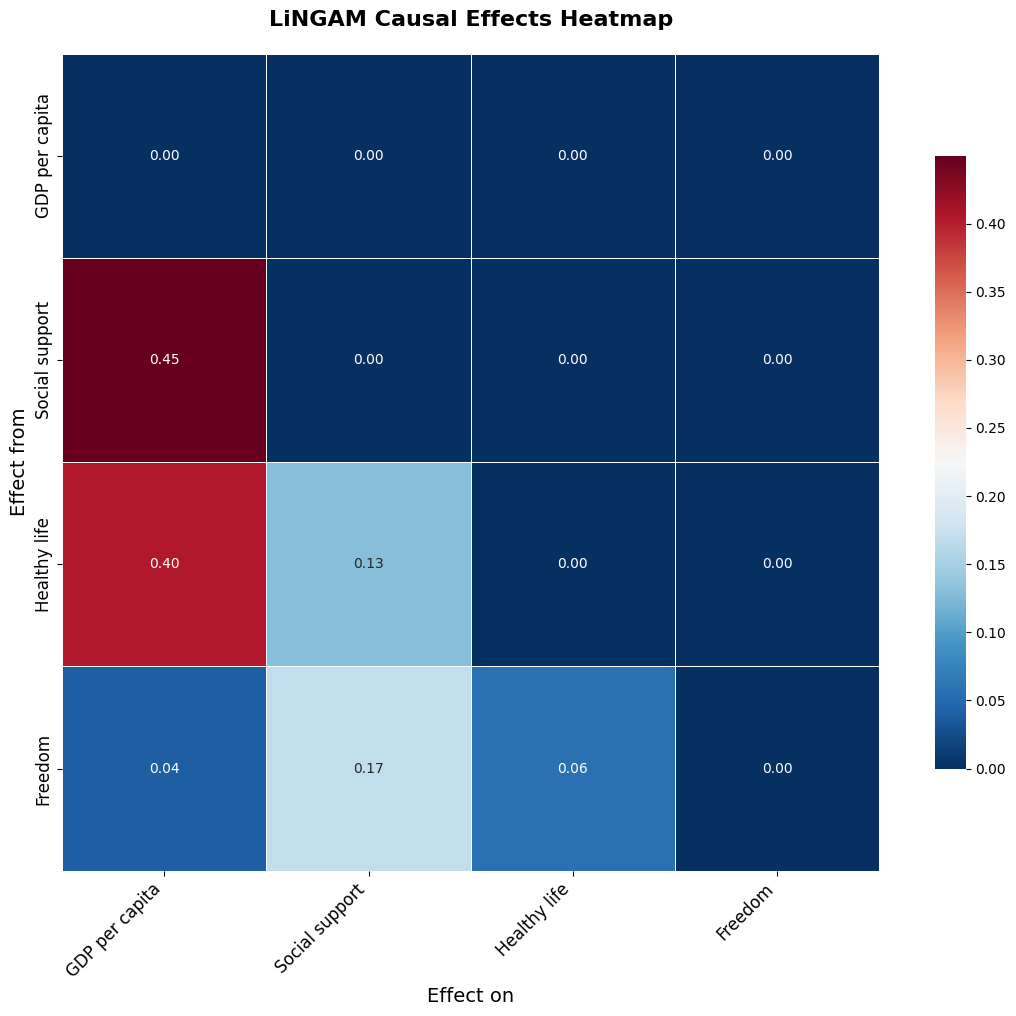

GDP per capita is influenced by Social support, Healthy life, Freedom.
Social support is influenced by Healthy life, Freedom.
Healthy life is influenced by Freedom.
Freedom is independent of other variables in this analysis.


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from lingam.direct_lingam import DirectLiNGAM

# Assuming you have a DataFrame `train_data` and a list `features` defined
# Fit a LiNGAM model
lingam_model = DirectLiNGAM()
lingam_model.fit(train_data[features])

# Causal ordering of variables
causal_order = lingam_model.causal_order_

# Causal coefficients
causal_effects = lingam_model.adjacency_matrix_

# Visualize causal ordering
print("Causal Ordering:", causal_order)

# Create a heatmap of the causal effects
plt.figure(figsize=(12, 10))
sns.heatmap(
    causal_effects,
    annot=True,
    cmap="RdBu_r",  # Use a diverging color map for better contrast
    fmt=".2f",  # Format for the annotations (2 decimal places)
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.75},  # Adjust color bar size
    xticklabels=features,
    yticklabels=features
)

plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)  # Adjust font size for y-axis labels
plt.title("LiNGAM Causal Effects Heatmap", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Effect on", fontsize=14)
plt.ylabel("Effect from", fontsize=14)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

# Interpret the causal effects based on the ordering and coefficients
for i, effect_to in enumerate(features):
    parents = [effect_from for effect_from, coef in zip(features, causal_effects[:, i]) if coef != 0]
    if parents:
        print(f"{effect_to} is influenced by {', '.join(parents)}.")
    else:
        print(f"{effect_to} is independent of other variables in this analysis.")


A **LiNGAM (Linear Non-Gaussian Acyclic Model) Causal Effects Heatmap** typically shows the estimated causal effects between different variables in a dataset. In the context of your analysis, it likely displays the causal relationships and the strength of the causal effects between the features (independent variables) and the outcome variable (Happiness Score).


- The printed output displays the results of a LiNGAM analysis, a method for uncovering causal relationships in a dataset. The adjacency matrix reveals the strength of directed causal connections between variables, where non-zero values in off-diagonal elements indicate the magnitude of the causal influence.

**For instance, a value of 0.45 in position (1, 0) suggests a causal relationship from  GDP per capita to Happiness score.**


- The causal ordering, represented as [0, 1, 2, 3], specifies the order in which variables are causally connected. This information is crucial for understanding the causal structure among variables, providing insights into the underlying relationships in the data.

- Where 0 is Happiness score
- 1 is GDP Percapita
- 2 is Social support
- 3 is Healthy Life

**CONCLUSION**

- 1. The analysis employed LiNGAM to uncover causal relationships among variables in the dataset, revealing a causal ordering [0, 1, 2, 3] indicative of a sequence from Happiness Score to GDP per capita, Social support, and Healthy life.
- 2. The adjacency matrix showcased the strength of directed causal connections, notably highlighting a significant causal effect (0.45) from GDP per capita to Happiness Score. For instance, a value of 0.45 in position (1, 0) suggests a causal relationship from  GDP per capita to Happiness score.
- 3. The LiNGAM Causal Effects Heatmap likely provided a visual summary of estimated effects, though specific values were not detailed.
- 4. The average treatment effects, derived from the DoWhy causal inference analysis, further emphasized the influential role of each variable on Happiness Score. GDP per capita demonstrated the highest estimated effect (30.66), followed by Freedom (27.81), Social support (25.94), and Healthy life (24.96).
- 5. Together, these findings offer a comprehensive understanding of the intricate causal relationships, shedding light on factors influencing happiness and informing potential interventions or policy decisions.

**References:**

https://www.iese.fraunhofer.de/blog/causal-inference/

https://info.causalens.com/causal-inference-lp?utm_term=causal%20inference&utm_campaign=Causal-AI&utm_source=adwords&utm_medium=ppc&hsa_acc=1665656246&hsa_cam=16697946142&hsa_grp=144834448712&hsa_ad=647616814548&hsa_src=g&hsa_tgt=kwd-299422901213&hsa_kw=causal%20inference&hsa_mt=e&hsa_net=adwords&hsa_ver=3&gad_source=1&gclid=Cj0KCQjw-_mvBhDwARIsAA-Q0Q5a8RjiC-cFzadrnMZb8MEBmYyaZe_fX0paEKSjwRGUWdINGrK8p9caAiOBEALw_wcB

https://medium.com/data-science-at-microsoft/causal-inference-part-1-of-3-understanding-the-fundamentals-816f4723e54a

https://github.com/py-why/dowhy

https://web.stanford.edu/~swager/stats361.pdf

https://lingam.readthedocs.io/en/latest/tutorial/lingam.html


MIT License

Copyright (c) 2024 Shivani Sahu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.